<h1>Data Exploration</h1>
<p>In this notebook we will perform a broad data exploration on the <code>Carseats</code> data set. Note that the aim of this exploratoin is not to be completely thorough; instead we would like to gain quick insights to help develop a first prototype. Upon analyzing the output of the prototype, we can analyze the data further to gain more insight.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%run ../../customModules/DataQualityReports.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<p>We first read the comma-separated values (csv) <code>Carseats</code> file into a pandas DataFrame. To get a feeling for the data we display the top five rows of the DataFrame using the <code>head()</code> method and we show how many rows and columns the DataFrame has by using the <code>shape</code> attribute. We also show the <code>dtypes</code> attribute, which returns a pandas Series with the data type of each column.</p>

In [2]:
df = pd.read_csv("Carseats.csv")
df.head()
df.shape
df.dtypes

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


(400, 11)

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

<p>Is appears that all the columns have the data type we would expect. We can perform another check to see if any values are missing in the DataFrame using its <code>isnull</code> method.</p>

In [3]:
df[df.isnull().any(axis=1)]
df[df.isnull().any(axis=1)].shape

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


(0, 11)

<p>It appears that there are no missing values in our data. So the next step to be able to produce the data quality reports with our custom <code>createDataQualityReports</code> function is to organize our DataFrame by quantitative and categorical variables using hierarchical indexing.</p>

In [4]:
df.columns = pd.MultiIndex.from_tuples([('quantitative', 'Sales'), ('quantitative', 'CompPrice'), 
                          ('quantitative', 'Income'), ('quantitative', 'Advertising'),
                         ('quantitative', 'Population'), ('quantitative', 'Price'), 
                        ('categorical', 'ShelveLoc'), ('quantitative', 'Age'), 
                        ('quantitative', 'Education'), ('categorical', 'Urban'), 
                            ('categorical', 'US')],
                        names=['type of variable', 'variable'])
df.sort_index(axis=1, level='type of variable', inplace=True)
df.head()

type of variable categorical            quantitative                          \
variable           ShelveLoc   US Urban  Advertising Age CompPrice Education   
0                        Bad  Yes   Yes           11  42       138        17   
1                       Good  Yes   Yes           16  65       111        10   
2                     Medium  Yes   Yes           10  59       113        12   
3                     Medium  Yes   Yes            4  55       117        14   
4                        Bad   No   Yes            3  38       141        13   

type of variable                                 
variable         Income Population Price  Sales  
0                    73        276   120   9.50  
1                    48        260    83  11.22  
2                    35        269    80  10.06  
3                   100        466    97   7.40  
4                    64        340   128   4.15

<p>Now we can create the data quality reports.</p>

In [5]:
df_qr_quantitative, df_qr_categorical = createDataQualityReports(df)
df_qr_quantitative.name + ':'
df_qr_quantitative.round(2)
df_qr_categorical.name + ':'
df_qr_categorical.round(2)

'Quantitative Qualilty Report:'

,Count,Miss. (%),Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
variable,,,,,,,,,,
Advertising,400,0.0,28,0.0,0.00,6.64,5.00,12.00,29.00,6.65
Age,400,0.0,56,25.0,39.75,53.32,54.50,66.00,80.00,16.20
CompPrice,400,0.0,73,77.0,115.00,124.98,125.00,135.00,175.00,15.33
Education,400,0.0,9,10.0,12.00,13.90,14.00,16.00,18.00,2.62
Income,400,0.0,98,21.0,42.75,68.66,69.00,91.00,120.00,27.99
Population,400,0.0,275,10.0,139.00,264.84,272.00,398.50,509.00,147.38
Price,400,0.0,101,24.0,100.00,115.80,117.00,131.00,191.00,23.68
Sales,400,0.0,336,0.0,5.39,7.50,7.49,9.32,16.27,2.82


'Categorical Qualilty Report:'

,Count,Miss. (%),Card.,Mode,Mode Freq.,Mode (%),2nd Mode,2nd Mode Freq.,2nd Mode (%)
variable,,,,,,,,,
ShelveLoc,400,0.0,3,Medium,219,54.75,Bad,96,24.0
US,400,0.0,2,Yes,258,64.50,No,142,35.5
Urban,400,0.0,2,Yes,282,70.50,No,118,29.5


<p>To further gain insight into the data, we use the <code>plotQuantitativeVariables</code> and <code>plotCategoricalVariables</code> functions the produce the frequency plots for each quantitative and categorical variable.</p>

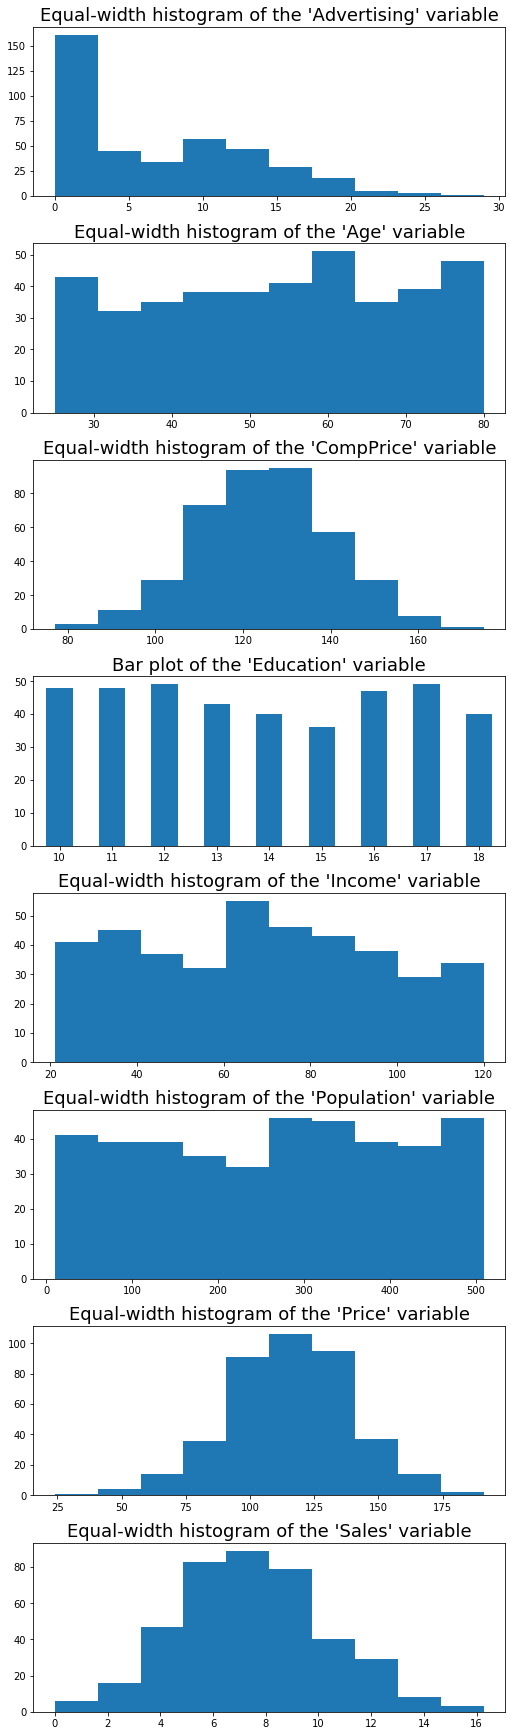

In [6]:
plotQuantitativeVariables(df, height=3, width=7)

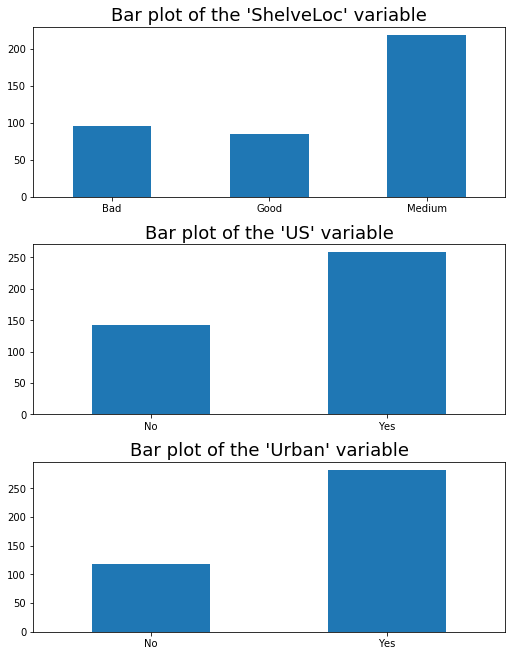

In [7]:
plotCategoricalVariables(df, height=3, width=7)

<p>We can also compute the correlation matrix of the variables.</p>

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)